In [12]:
!pip3 install selenium==4.6.0
!pip3 install webdriver-manager==3.8.5

You should consider upgrading via the '/Users/stories2/Documents/GitHub/python-data-crawler/crawl-venv/bin/python3 -m pip install --upgrade pip' command.
  Using cached webdriver_manager-3.8.5-py2.py3-none-any.whl (27 kB)
  Attempting uninstall: webdriver-manager
    Found existing installation: webdriver-manager 3.7.1
    Uninstalling webdriver-manager-3.7.1:
      Successfully uninstalled webdriver-manager-3.7.1
You should consider upgrading via the '/Users/stories2/Documents/GitHub/python-data-crawler/crawl-venv/bin/python3 -m pip install --upgrade pip' command.


https://files.pythonhosted.org/packages/c7/35/721fde638ea1ed2f32851f89544d04dab573ff629496f0275f4e7d5f5f29/selenium-4.6.0-py3-none-any.whl

In [10]:
# !python3 -m pip install ./selenium-4.6.0-py3-none-any.whl

Processing ./selenium-4.6.0-py3-none-any.whl
  Attempting uninstall: selenium
    Found existing installation: selenium 4.0.0a7
    Uninstalling selenium-4.0.0a7:
      Successfully uninstalled selenium-4.0.0a7
You should consider upgrading via the '/Users/stories2/Documents/GitHub/python-data-crawler/crawl-venv/bin/python3 -m pip install --upgrade pip' command.


In [11]:
!python3 --version

Python 3.9.1


In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By

from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.core.utils import ChromeType
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service

import os

from IPython import display
from base64 import b64decode

chrome_service = Service(ChromeDriverManager().install())

In [6]:
# Get environment variables
IS_GITHUB_ACTION = os.getenv('IS_GITHUB_ACTION')

In [7]:
chrome_options = Options()
if IS_GITHUB_ACTION:
    options = [
        "--headless",
        "--disable-gpu",
        "--window-size=1920,1080",
        "--ignore-certificate-errors",
        "--disable-extensions",
        "--no-sandbox",
        "--disable-dev-shm-usage"
    ]
    user_agent = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.50 Safari/537.36'    
    chrome_options.add_argument('user-agent={0}'.format(user_agent))
    for option in options:
        chrome_options.add_argument(option)

In [37]:
browser = webdriver.Chrome(service=chrome_service, options=chrome_options)
browser.set_window_size(1920, 1080)
browser.get('https://www.hotelscombined.co.kr/hotels/')

In [39]:
browser.find_element(By.CSS_SELECTOR, '#ZG5G-accept').click() 
# ZG5G-accept

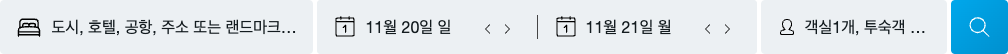

In [41]:
#vsni > div > div > div.HPw7-form-fields
form = browser.find_element(By.CSS_SELECTOR, '#vsni > div > div')
form
display.Image(b64decode(form.screenshot_as_base64))

In [18]:
form.find_element(By.CSS_SELECTOR, '.HPw7-destination').click()

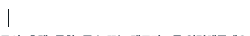

In [20]:
focusedElement = browser.switch_to.active_element
focusedElement
display.Image(b64decode(focusedElement.screenshot_as_base64))

In [23]:
focusedElement.clear()

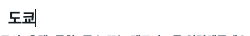

In [25]:
focusedElement.send_keys('도쿄')
display.Image(b64decode(focusedElement.screenshot_as_base64))

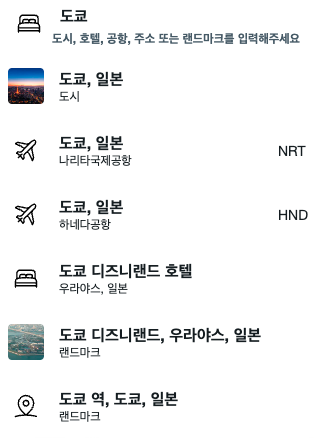

In [29]:
# focusedElement.find_element(By.CSS_SELECTOR, '.c8GSD-overlay-dropdown')
selector = browser.find_element(By.CSS_SELECTOR, 'div.c8GSD-wrapper')
display.Image(b64decode(selector.screenshot_as_base64))

In [35]:
selectList = selector.find_elements(By.TAG_NAME, 'li')
for select in selectList:
    print(select.find_element(By.CSS_SELECTOR, '.JyN0-name').text)

도쿄, 일본
도쿄, 일본
도쿄, 일본
도쿄 디즈니랜드 호텔
도쿄 디즈니랜드, 우라야스, 일본
도쿄 역, 도쿄, 일본


In [36]:
browser.close()

In [ ]:
fuckinig lier